In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime

In [2]:
train = pd.read_csv('train_users_2.csv', parse_dates=['date_account_created','timestamp_first_active','date_first_booking'])
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
train.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

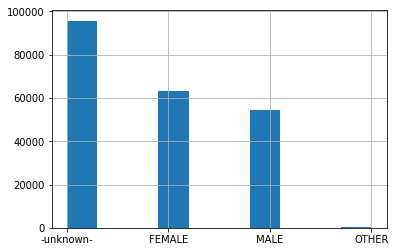

In [5]:
#Gender
train.gender.hist()
plt.show()

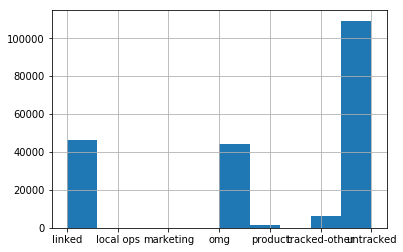

In [6]:
train['first_affiliate_tracked'].hist()
plt.figure(figsize=(1,1))
plt.show()

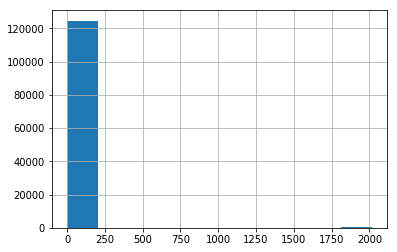

In [7]:
#fix this histogram
train['age'].hist(bins=10)
plt.show()

In [8]:
train['timestamp_first_active_to_date'] = pd.to_datetime(train['timestamp_first_active'], format='%Y%m%d%H%M%S')



In [9]:
train['timestamp_first_active_to_date'].head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active_to_date, dtype: datetime64[ns]

In [10]:
train['timestamp_first_active_to_date'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [11]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [12]:
#impute age missing values with the median

train['age'].fillna(train['age'].median() , inplace = True)

In [13]:
#impute first_affiliate_tracked missing values with the mode

train['first_affiliate_tracked'].fillna(train['first_affiliate_tracked'].mode()[0] , inplace = True)

In [14]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_first_active_to_date
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


In [15]:
train['date_first_booking'].head(20)

0           NaT
1           NaT
2    2010-08-02
3    2012-09-08
4    2010-02-18
5    2010-01-02
6    2010-01-05
7    2010-01-13
8    2010-07-29
9    2010-01-04
10   2010-01-06
11          NaT
12   2010-01-18
13          NaT
14          NaT
15   2010-01-08
16          NaT
17   2010-01-09
18          NaT
19   2010-01-10
Name: date_first_booking, dtype: datetime64[ns]

### - Features ENG

In [16]:
#was a first booking made
train['first_booking_made'] = pd.notnull(train.loc[:, 'date_first_booking'])
#convert to integer 
train['first_booking_made'] = train['first_booking_made'].astype(int)

In [17]:
train['first_booking_made'].head()

0    0
1    0
2    1
3    1
4    1
Name: first_booking_made, dtype: int64

In [18]:
#Not needed because I parse the column in the date. when reading in the dataset
#train['timestamp_first_active'] = train['timestamp_first_active'].astype(int)

In [19]:
train['timestamp_first_active'].head()

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

In [20]:
train.isnull().sum(axis=0)

id                                     0
date_account_created                   0
timestamp_first_active                 0
date_first_booking                124543
gender                                 0
age                                    0
signup_method                          0
signup_flow                            0
language                               0
affiliate_channel                      0
affiliate_provider                     0
first_affiliate_tracked                0
signup_app                             0
first_device_type                      0
first_browser                          0
country_destination                    0
timestamp_first_active_to_date         0
first_booking_made                     0
dtype: int64

In [21]:
train['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

In [22]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [23]:
#convert type to date type
train['timestamp_first_active_to_date'] = pd.to_datetime(train['timestamp_first_active_to_date'])

In [24]:
train['timestamp_first_active_to_date'].head()

0   2009-03-19
1   2009-05-23
2   2009-06-09
3   2009-10-31
4   2009-12-08
Name: timestamp_first_active_to_date, dtype: datetime64[ns]

In [25]:
train['timestamp_first_active_to_date'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [26]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [27]:
train.isnull().sum(axis=0)

id                                     0
date_account_created                   0
timestamp_first_active                 0
date_first_booking                124543
gender                                 0
age                                    0
signup_method                          0
signup_flow                            0
language                               0
affiliate_channel                      0
affiliate_provider                     0
first_affiliate_tracked                0
signup_app                             0
first_device_type                      0
first_browser                          0
country_destination                    0
timestamp_first_active_to_date         0
first_booking_made                     0
dtype: int64

In [28]:
#was a first booking made
train['first_booking_made'] = pd.notnull(train.loc[:, 'date_first_booking'])

In [29]:
#convert to integer 
train['first_booking_made'] = train['first_booking_made'].astype(int)

In [30]:
#was a first booking made
train['first_booking_made'].head() 

0    0
1    0
2    1
3    1
4    1
Name: first_booking_made, dtype: int64

- New columns

In [31]:
# date_account_created  timestamp_first_active  date_first_booking

In [32]:
train['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

In [33]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [34]:
train['timestamp_first_active'].head()
#Use timestamp_first_active_to_date instead

0   2009-03-19 04:32:55
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4   2009-12-08 06:11:05
Name: timestamp_first_active, dtype: datetime64[ns]

In [35]:
train['timestamp_first_active_to_date'].head()

0    2009-03-19
1    2009-05-23
2    2009-06-09
3    2009-10-31
4    2009-12-08
Name: timestamp_first_active_to_date, dtype: object

In [36]:
#convert type to date type
train['timestamp_first_active_to_date'] = pd.to_datetime(train['timestamp_first_active_to_date'])

In [37]:
train['timestamp_first_active_to_date'].head()

0   2009-03-19
1   2009-05-23
2   2009-06-09
3   2009-10-31
4   2009-12-08
Name: timestamp_first_active_to_date, dtype: datetime64[ns]

In [38]:
train['number_of_days_btw_first_active_first_booking'] = train['date_first_booking'] - train['timestamp_first_active_to_date']

In [39]:
train['number_of_days_btw_first_active_first_booking'].head()

0         NaT
1         NaT
2    419 days
3   1043 days
4     72 days
Name: number_of_days_btw_first_active_first_booking, dtype: timedelta64[ns]

In [40]:
#do a histogram of the above number of days and put in a bin to see the most frequent

In [41]:
#get the time of the month most become active
#check if it is seasonal and maybe us the destination as hue- like a stacked bar chart



In [42]:
#train['month_of_first_active'].head()

In [43]:
#train['month_of_first_active'].hist()
#plt.show()

In [44]:
#get the time of the month most people created their account
#check if it is seasonal and maybe us the destination as hue- like a stacked bar chart



In [45]:
train['month_timestamp_first_active_to_date'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%m'))

In [46]:
train['month_timestamp_first_active_to_date'].head()

0    03
1    05
2    06
3    10
4    12
Name: month_timestamp_first_active_to_date, dtype: object

In [47]:
train['year_timestamp_first_active_to_date'] = train['timestamp_first_active_to_date'].apply(lambda x: x.strftime('%Y'))

In [48]:
train['year_timestamp_first_active_to_date'].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: year_timestamp_first_active_to_date, dtype: object

In [49]:
train['month_account_created'] = train['date_account_created'].apply(lambda x: x.strftime('%m'))

In [50]:
train['year_account_created'] = train['date_account_created'].apply(lambda x: x.strftime('%Y'))

In [51]:
train['month_account_created'].head()

0    06
1    05
2    09
3    12
4    09
Name: month_account_created, dtype: object

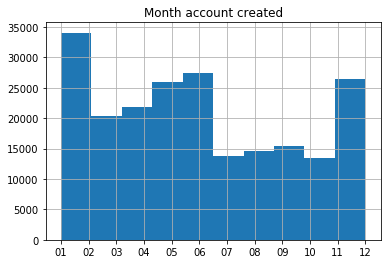

In [52]:
train['month_account_created'].hist()
plt.title('Month account created')
plt.show()

In [53]:
train['date_first_booking'].head()

0          NaT
1          NaT
2   2010-08-02
3   2012-09-08
4   2010-02-18
Name: date_first_booking, dtype: datetime64[ns]

In [54]:
#train['country_destination'].value_counts().bar

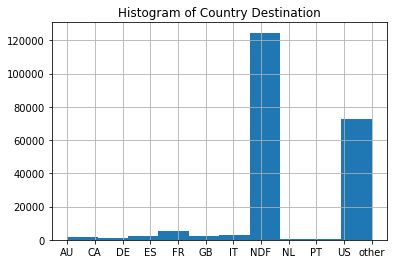

In [55]:
train['country_destination'].hist()
plt.title('Histogram of Country Destination')
plt.show()

In [56]:
import seaborn as sns

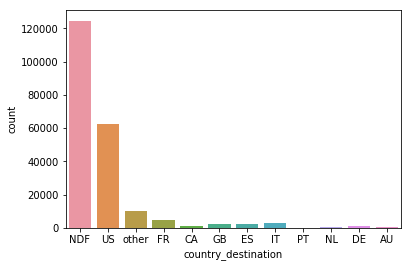

In [57]:
ax = sns.countplot(x='country_destination', data=train, )

plt.show()

In [58]:
train['month_of_first_booking'] =  train['date_first_booking'].map(lambda x: x.strftime('%m') if pd.notnull(x) else 'NaN')

In [59]:
train['year_of_first_booking'] =  train['date_first_booking'].map(lambda x: x.strftime('%Y') if pd.notnull(x) else 'NaN')

In [60]:
train['year_of_first_booking'].head()

0     NaN
1     NaN
2    2010
3    2012
4    2010
Name: year_of_first_booking, dtype: object

In [61]:
train['month_of_first_booking'].head()

0    NaN
1    NaN
2     08
3     09
4     02
Name: month_of_first_booking, dtype: object

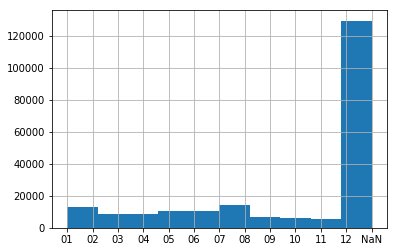

In [62]:
train['month_of_first_booking'].hist()
plt.show()

In [63]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,country_destination,timestamp_first_active_to_date,first_booking_made,number_of_days_btw_first_active_first_booking,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created,month_of_first_booking,year_of_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,34.0,facebook,0,en,direct,...,NDF,2009-03-19,0,NaT,03,2009,06,2010,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NDF,2009-05-23,0,NaT,05,2009,05,2011,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,US,2009-06-09,1,419 days,06,2009,09,2010,08,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,other,2009-10-31,1,1043 days,10,2009,12,2011,09,2012
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,US,2009-12-08,1,72 days,12,2009,09,2010,02,2010


In [64]:
train.isnull().sum(axis=0)

id                                                    0
date_account_created                                  0
timestamp_first_active                                0
date_first_booking                               124543
gender                                                0
age                                                   0
signup_method                                         0
signup_flow                                           0
language                                              0
affiliate_channel                                     0
affiliate_provider                                    0
first_affiliate_tracked                               0
signup_app                                            0
first_device_type                                     0
first_browser                                         0
country_destination                                   0
timestamp_first_active_to_date                        0
first_booking_made                              

In [65]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,country_destination,timestamp_first_active_to_date,first_booking_made,number_of_days_btw_first_active_first_booking,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created,month_of_first_booking,year_of_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,34.0,facebook,0,en,direct,...,NDF,2009-03-19,0,NaT,03,2009,06,2010,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NDF,2009-05-23,0,NaT,05,2009,05,2011,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,US,2009-06-09,1,419 days,06,2009,09,2010,08,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,other,2009-10-31,1,1043 days,10,2009,12,2011,09,2012
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,US,2009-12-08,1,72 days,12,2009,09,2010,02,2010


In [66]:
train['number_of_days_btw_first_active_first_booking'].head()

0         NaT
1         NaT
2    419 days
3   1043 days
4     72 days
Name: number_of_days_btw_first_active_first_booking, dtype: timedelta64[ns]

In [67]:
train['number_of_days_btw_first_active_first_booking'] = train['number_of_days_btw_first_active_first_booking'].dt.days

In [68]:
train['number_of_days_btw_first_active_first_booking'].head()

0       NaN
1       NaN
2     419.0
3    1043.0
4      72.0
Name: number_of_days_btw_first_active_first_booking, dtype: float64

In [69]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,country_destination,timestamp_first_active_to_date,first_booking_made,number_of_days_btw_first_active_first_booking,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created,month_of_first_booking,year_of_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,34.0,facebook,0,en,direct,...,NDF,2009-03-19,0,NaN,03,2009,06,2010,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,NDF,2009-05-23,0,NaN,05,2009,05,2011,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,US,2009-06-09,1,419.0,06,2009,09,2010,08,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,other,2009-10-31,1,1043.0,10,2009,12,2011,09,2012
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,US,2009-12-08,1,72.0,12,2009,09,2010,02,2010


In [70]:
X = train.drop(['id','timestamp_first_active_to_date','date_account_created','timestamp_first_active','date_first_booking', 'country_destination'],axis=1)

In [71]:
#I dropped the missing values or columns in df1
df1 = train.drop(['id','timestamp_first_active_to_date','number_of_days_btw_first_active_first_booking','month_of_first_booking','year_of_first_booking','date_account_created','timestamp_first_active','date_first_booking', 'country_destination'],axis=1)

In [72]:
df1.shape

(213451, 16)

In [73]:
df1.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_booking_made,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0,03,2009,06,2010
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0,05,2009,05,2011
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1,06,2009,09,2010
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1,10,2009,12,2011
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1,12,2009,09,2010


In [74]:
# df2 I didnt drop that column instead i filled it with 0

In [75]:
df2 = train.drop(['id','date_account_created','timestamp_first_active_to_date','timestamp_first_active','date_first_booking', 'country_destination'],axis=1)

In [76]:
df2.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_booking_made,number_of_days_btw_first_active_first_booking,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created,month_of_first_booking,year_of_first_booking
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0,NaN,03,2009,06,2010,NaN,NaN
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0,NaN,05,2009,05,2011,NaN,NaN
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1,419.0,06,2009,09,2010,08,2010
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1,1043.0,10,2009,12,2011,09,2012
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1,72.0,12,2009,09,2010,02,2010


In [77]:
df2['number_of_days_btw_first_active_first_booking'].fillna(0, inplace= True)

In [78]:
df2['month_of_first_booking'].fillna(0, inplace= True)

In [79]:
df2['year_of_first_booking'].fillna(0, inplace= True)

In [80]:
#X = df1

In [81]:
X = df2

In [82]:
X.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,first_booking_made,number_of_days_btw_first_active_first_booking,month_timestamp_first_active_to_date,year_timestamp_first_active_to_date,month_account_created,year_account_created,month_of_first_booking,year_of_first_booking
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0,0.0,03,2009,06,2010,NaN,NaN
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0,0.0,05,2009,05,2011,NaN,NaN
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1,419.0,06,2009,09,2010,08,2010
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1,1043.0,10,2009,12,2011,09,2012
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1,72.0,12,2009,09,2010,02,2010


In [83]:
X.isnull().sum(axis=0)

gender                                           0
age                                              0
signup_method                                    0
signup_flow                                      0
language                                         0
affiliate_channel                                0
affiliate_provider                               0
first_affiliate_tracked                          0
signup_app                                       0
first_device_type                                0
first_browser                                    0
first_booking_made                               0
number_of_days_btw_first_active_first_booking    0
month_timestamp_first_active_to_date             0
year_timestamp_first_active_to_date              0
month_account_created                            0
year_account_created                             0
month_of_first_booking                           0
year_of_first_booking                            0
dtype: int64

In [84]:
X = pd.get_dummies(X, drop_first = True)

In [85]:
X.shape

(213451, 174)

In [86]:
X.columns

Index(['age', 'signup_flow', 'first_booking_made',
       'number_of_days_btw_first_active_first_booking', 'gender_FEMALE',
       'gender_MALE', 'gender_OTHER', 'signup_method_facebook',
       'signup_method_google', 'language_cs',
       ...
       'month_of_first_booking_10', 'month_of_first_booking_11',
       'month_of_first_booking_12', 'month_of_first_booking_NaN',
       'year_of_first_booking_2011', 'year_of_first_booking_2012',
       'year_of_first_booking_2013', 'year_of_first_booking_2014',
       'year_of_first_booking_2015', 'year_of_first_booking_NaN'],
      dtype='object', length=174)

In [87]:
y = train['country_destination']

In [88]:
label_encode = LabelEncoder()

y = label_encode.fit_transform(y)
y

array([ 7,  7, 10, ...,  7,  7,  7])

In [89]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
#Spilt Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [91]:
## - Scale the Data


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [93]:
X_test_std.shape

(64036, 174)

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Train the model 
rfc.fit(X_train_std,y_train)
y_pred = rfc.predict(X_test_std)


# Get the feature importances
# Implement me
importances = rfc.feature_importances_

In [95]:
rfc.score(X_test_std,y_test)

0.85005309513398708

In [96]:
y_pred

array([10, 11, 10, ...,  7,  7,  7])

In [97]:
d = {'predicted': y_pred, 'actual': y_test}
rfc_df = pd.DataFrame(data=d)
rfc_df.head()

,actual,predicted
0,11,10
1,10,11
2,4,10
3,7,7
4,10,10


In [98]:
accuracy = sum(rfc_df['predicted'] == rfc_df['actual'])/len(rfc_df.index) # Check accuracy
accuracy

0.85005309513398708

In [99]:
len(X.columns)

174

In [100]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns[:])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances

year_of_first_booking_NaN                        2.554353e-01
number_of_days_btw_first_active_first_booking    1.553229e-01
month_of_first_booking_NaN                       9.237482e-02
first_booking_made                               8.515832e-02
age                                              8.110893e-02
year_of_first_booking_2013                       4.399316e-02
year_of_first_booking_2014                       2.336753e-02
first_affiliate_tracked_untracked                1.292699e-02
signup_method_facebook                           1.217951e-02
gender_MALE                                      1.132316e-02
gender_FEMALE                                    1.131155e-02
month_of_first_booking_06                        1.061214e-02
month_of_first_booking_05                        9.029970e-03
year_of_first_booking_2012                       8.960075e-03
first_browser_Chrome                             8.838919e-03
month_of_first_booking_07                        8.235754e-03
signup_f

In [101]:
f_importances[1:154]

number_of_days_btw_first_active_first_booking    1.553229e-01
month_of_first_booking_NaN                       9.237482e-02
first_booking_made                               8.515832e-02
age                                              8.110893e-02
year_of_first_booking_2013                       4.399316e-02
year_of_first_booking_2014                       2.336753e-02
first_affiliate_tracked_untracked                1.292699e-02
signup_method_facebook                           1.217951e-02
gender_MALE                                      1.132316e-02
gender_FEMALE                                    1.131155e-02
month_of_first_booking_06                        1.061214e-02
month_of_first_booking_05                        9.029970e-03
year_of_first_booking_2012                       8.960075e-03
first_browser_Chrome                             8.838919e-03
month_of_first_booking_07                        8.235754e-03
signup_flow                                      8.125953e-03
month_of

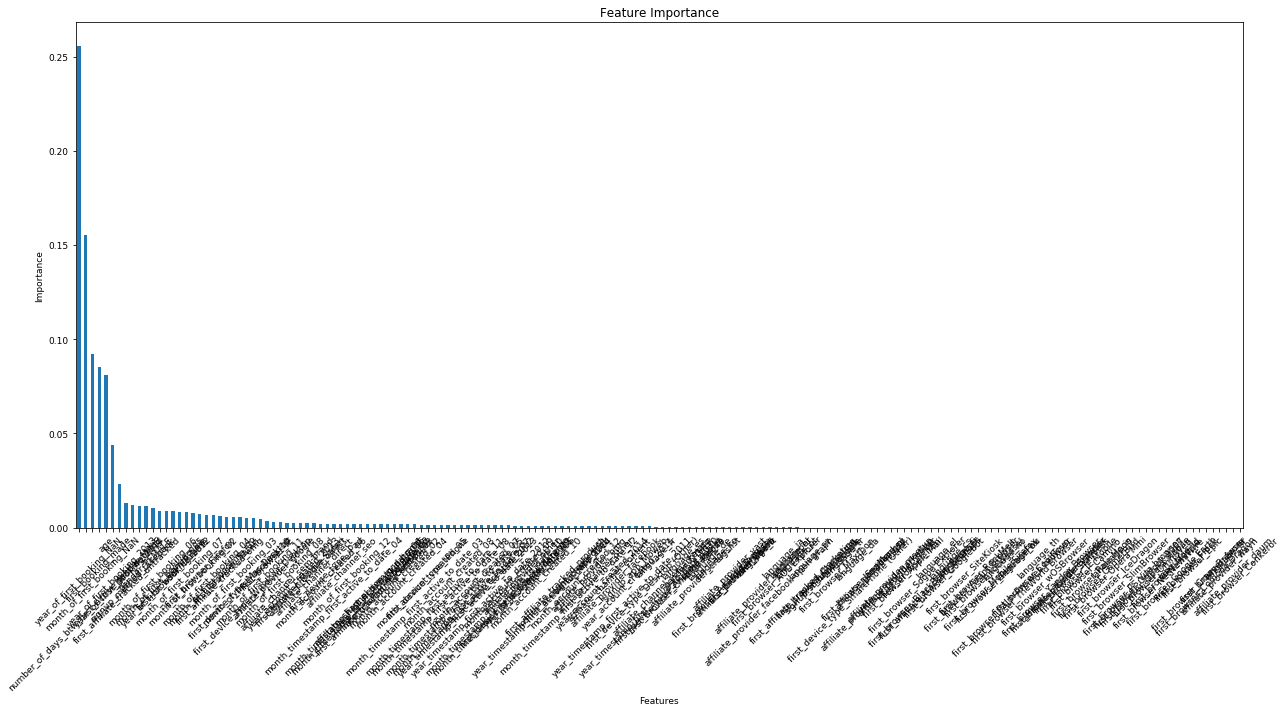

In [ ]:
# Make the bar Plot from f_importances 
plt.figure(figsize=(18,10))
f_importances.plot(kind='bar', fontsize=9, rot=45)
plt.xlabel('Features', fontsize=9)
plt.ylabel('Importance', fontsize=9)
plt.title('Feature Importance')
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
model1 = lr.fit(X_train_std, y_train)

In [ ]:
y_pred1 = model.predict(X_test_std)

In [ ]:
model.score(X_test_std,y_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = train['country_destination'].unique()
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

In [ ]:
ridge_y_pred = ridge.predict(X_test)
ridge_f1 = f1_score(y_test, ridge_y_pred, average="weighted")

In [ ]:
##F1 Score
ridge_f1

In [ ]:
ridge.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train, y_train)

In [ ]:
sgd_y_pred = sgd_model.predict(X_test)
sgd_f1 = f1_score(y_test, sgd_y_pred, average="weighted")

In [ ]:
##F1 Score
sgd_f1


In [ ]:
sgd.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive_aggressive = PassiveAggressiveClassifier(max_iter=1000)
passive_aggressive.fit(X_train, y_train)

In [ ]:
passive_aggressive_y_pred = passive_model.predict(X_test)
passive_aggressive_f1 = f1_score(y_test, passive_aggressive_y_pred, average="weighted")

In [ ]:
##F1 Score
passive_aggressive_f1

In [ ]:
passive_aggressive.score(X_test,y_test)

In [ ]:
### Evaluation F1 Score and ACcuracy